<a href="https://colab.research.google.com/github/BryaanR/BryanReyesIA/blob/main/Proyecto_RedNeuronalConvolucionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files

Subir imagenes desde tu ordenador.

In [3]:
uploaded = files.upload()


Saving IMG_1.jpg to IMG_1.jpg
Saving IMG_2.jpg to IMG_2.jpg
Saving IMG_3.jpg to IMG_3.jpg
Saving IMG_4.jpg to IMG_4.jpg


In [4]:
import os
import matplotlib.pyplot as plt


Almacenar las fotos que subí

In [5]:

target_dir = 'dataset'


En dado caso que no exista un directorio al cual se iran las imagenes,
creamos uno

In [6]:

if not os.path.exists(target_dir):
    os.makedirs(target_dir)


Guarde las imagenes en dicho directorio que cree anteriormente

In [7]:
for filename, image_data in uploaded.items():
    with open(os.path.join(target_dir, filename), 'wb') as file:
        file.write(image_data)

Al momoento de haber subido las fotos cargadas, se obtendra una ruta de las mismas

In [8]:
image_paths = [os.path.join(target_dir, filename) for filename in uploaded.keys()]


Agregue los nombre de la imagen a quien pertenece (en este caso a mi), por medio de etiquetas

In [10]:
labels = ['Bryan Reyes'] * len(image_paths)

Se deben almacenar dichas etiquetas e imagenes anteriores ya cargadas

In [11]:
train_labels = []
train_images = []


Cargarlas

In [12]:
for image_path, label in zip(image_paths, labels):
    image = Image.open(image_path)
    image = image.resize((64, 64))
    image = np.array(image) / 255.0
    train_images.append(image)
    train_labels.append(label)

Convierte las listas a matrices numpy, por medio de lo investigado, es una libreria de alagebra lineal de Phyton

In [13]:
train_images = np.array(train_images)

Hacer la conversiones de las etiquetas ya establecidas a numeros

In [15]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)

Aquí el desarollo del modelo establecido

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Realizar la compilación del modelo

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Realizar el entrenamiendo del modelo establecido

In [18]:
model.fit(train_images, train_labels, epochs=12, batch_size=30)

Epoch 1/12
1/1 [==============================] - 2s 2s/step - loss: 0.7250 - accuracy: 0.0000e+00
Epoch 2/12
1/1 [==============================] - 0s 43ms/step - loss: 0.5293 - accuracy: 1.0000
Epoch 3/12
1/1 [==============================] - 0s 40ms/step - loss: 0.3140 - accuracy: 1.0000
Epoch 4/12
1/1 [==============================] - 0s 40ms/step - loss: 0.0958 - accuracy: 1.0000
Epoch 5/12
1/1 [==============================] - 0s 45ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 6/12
1/1 [==============================] - 0s 42ms/step - loss: 2.7105e-04 - accuracy: 1.0000
Epoch 7/12
1/1 [==============================] - 0s 43ms/step - loss: 2.9824e-06 - accuracy: 1.0000
Epoch 8/12
1/1 [==============================] - 0s 38ms/step - loss: 1.3595e-08 - accuracy: 1.0000
Epoch 9/12
1/1 [==============================] - 0s 39ms/step - loss: 2.8992e-11 - accuracy: 1.0000
Epoch 10/12
1/1 [==============================] - 0s 40ms/step - loss: 3.2336e-14 - accuracy: 1.0000
Epoch 1

Guardarlo

In [19]:
model.save('modelo_reconocimiento_facial.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Clasificar los resultados y mostrarlos

In [20]:
test_images = train_images

Prueba de imagenes por medio de la predicción

In [21]:
predictions = model.predict(test_images)

1/1 [==============================] - 0s 131ms/step


Realizar una decodificación de las predicciones anteriores a etiquetas para mostrarla posteriormente

In [22]:
predicted_labels = label_encoder.inverse_transform(predictions.reshape(-1).round().astype(int))

Mostrar los resultados ya una vez estructurado y obenito la decodificación anterior

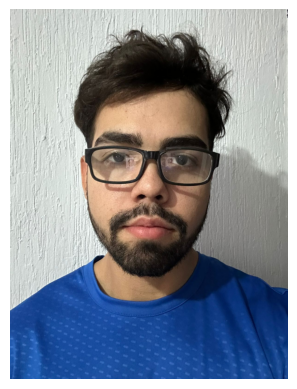

Etiqueta detectada con exito: Bryan Reyes
-------------------------


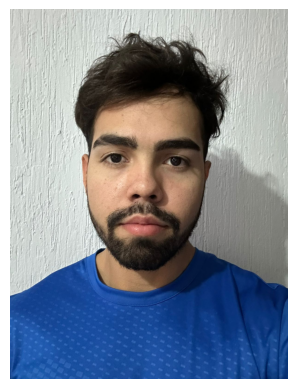

Etiqueta detectada con exito: Bryan Reyes
-------------------------


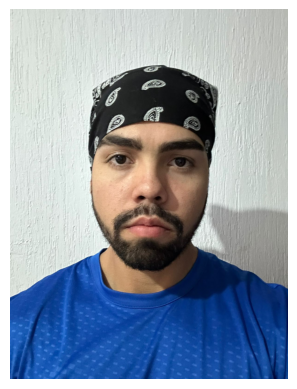

Etiqueta detectada con exito: Bryan Reyes
-------------------------


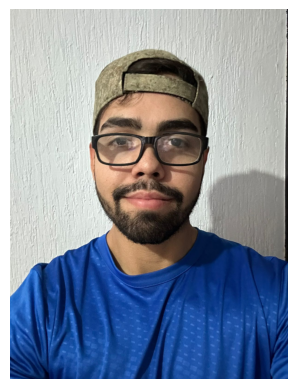

Etiqueta detectada con exito: Bryan Reyes
-------------------------


In [25]:
for image_path, predicted_label in zip(image_paths, predicted_labels):
    # Cargar y mostrar la imagen
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Mostrar la etiqueta predicha
    print(f"Etiqueta detectada con exito: {predicted_label}")
    print("-------------------------")